HW2  
Name: Md Ishtiaq Ahmed  
Aggie ID: 800606216

# Imports

In [396]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time


# Task 1

In [149]:
class Perceptron:
    
   
    # Initialization
    def __init__(self, eta = 0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    # Training
    
    def fit(self,X,y):     
        rgen = np.random.RandomState(50)
        self.w_ = rgen.normal(loc=0.0, scale = 0.01, size = 1+X.shape[1])
        self.errors = []
        self.accuracy=[]
        
        for _ in range (self.n_iter):
            errors = 0
            accuracy = 0
            for xi,target in zip(X,y):
                update = self.eta * (target-self.predict(xi))
                self.w_[1:] += update*xi
                self.w_[0] += update
                errors += int(update!=0.0)
                

            self.errors.append(errors)
            accuracy = 1-errors/y.size
            self.accuracy.append(accuracy)
        return self
    
    # Prediction
    
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) +self.w_[0]
    
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)
                 
            

# Task 2

In [150]:
class Adaline:
    def __init__(self,eta = 0.01, n_iter = 50,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    # Training
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale = 0.01, size = 1+ X.shape[1])
        self.cost_ = []
        self.accuracy_ = []
        
        for _ in range (self.n_iter):
            net_input = self.net_input(X)
            output = net_input
            accuracy = 0
            accuracy = np.sum(np.equal(y, self.predict(X))) / y.size
            errors = (y-output)
            self.w_[1:] += self.eta*X.T.dot(errors)
            self.w_[0] += self.eta* errors.sum()
            cost = (errors**2).sum()/2.0
            self.cost_.append(cost)
            self.accuracy_.append(accuracy)
        return self
        
    # Prediction
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
        
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1)
            

# Task 3

In [360]:
class AdalineSGD:
    def __init__(self,eta = 0.01, n_iter = 50,random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    # Training
    def fit(self,X,y):
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0,scale = 0.01, size = 1+ X.shape[1])
        self.cost_ = []
        self.accuracy_ = []
        
        for _ in range (self.n_iter):
            X,y = self._shuffle(X,y)
            cost = []
            accuracy = []
            for xi,target in zip(X,y):
                cost.append(self._update_weights(xi,target))
                accuracy = np.sum(self.predict(xi)==y) / y.size

            avg_cost = sum(cost)/len(y)
            self.cost_.append(avg_cost)
            self.accuracy_.append(accuracy)
    def _shuffle(self,X,y):
        r = self.rgen.permutation(len(y))
        return X[r],y[r]
    
    def _update_weights(self,xi,target):
        output = self.net_input(xi)
        error = (target-output)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] +- self.eta * error
        cost = 0.5 * error**2
        return cost
    
    # Prediction
    def net_input(self,X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
        
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0,1,-1) 


# Task 4

Enter Classifier Name: 'perceptron', 'adaline', 'sgd'
Enter classifier name: sgd
Data File Path Information: 
Link for IRIS Data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Link for Data: 
Enter Data Path Link:https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


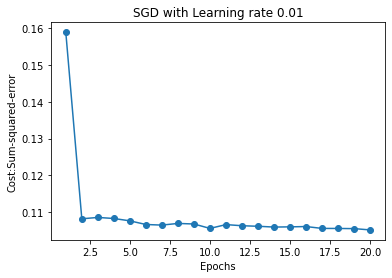

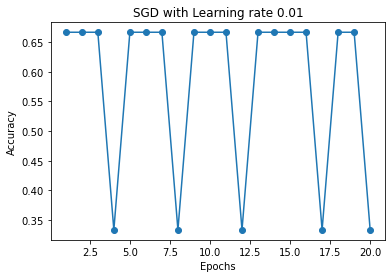

The running of above program is : 480.73530197143555 ms


In [410]:
try:

    print("Enter Classifier Name: 'perceptron', 'adaline', 'sgd'")
    classifier = input("Enter classifier name: ")
    if classifier not in ['perceptron','adaline','sgd']:
        print("You have entered wrong classifier name. Please choose from: 'perceptron', 'adaline', 'sgd' ")
        raise Exception ()
    #'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print("Data File Path Information: ")
    print("Link for IRIS Data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
    print("Link for Data: ")

    data_path = input("Enter Data Path Link:")

    df = pd.read_csv(data_path,header = None, encoding='utf-8')
    X = df.iloc[:,0:4].values
    y = df.iloc[:,4].values
    y = np.where(y=='Iris-setosa',1,-1) # replacing class label with value
    
    '''
    sc = StandardScaler()
    sc.fit(X)
    X_std = sc.transform(X)

    ''' 
    #Normalizing the dataset
    X_std = np.copy(X)
    
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
    
    
    if classifier == "perceptron":
        start_time = time.time()
        ppn1 = Perceptron(eta = 0.01,n_iter=20,random_state=1)
        ppn1.fit(X_std,y)
        plt.plot(range(1, len(ppn1.errors) + 1), ppn1.errors, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of updates')
        plt.title('Perceptron with Learning rate 0.01')
        plt.show()
        
        ppn2 = Perceptron(eta = 0.01,n_iter=20,random_state=1)
        ppn2.fit(X_std,y)
        plt.plot(range(1, len(ppn2.accuracy) + 1), ppn2.accuracy, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Perceptron with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
        
    elif classifier == "adaline":
        start_time = time.time()
        adl1 = Adaline(eta = 0.01,n_iter=20,random_state=1)
        adl1.fit(X_std,y)
        plt.plot(range(1, len(adl1.cost_) + 1), adl1.cost_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost:Sum-squared-error')
        plt.title('Adaline with Learning rate 0.01')
        plt.show()
        
        adl2 = Adaline(eta = 0.01,n_iter=20,random_state=1)
        adl2.fit(X_std,y)
        plt.plot(range(1, len(adl2.accuracy_) + 1), adl2.accuracy_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Adaline with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
        
    elif classifier == "sgd":
        start_time = time.time()
        sgd1 = AdalineSGD(eta = 0.01,n_iter=20)
        sgd1.fit(X_std,y)
        plt.plot(range(1, len(sgd1.cost_) + 1), sgd1.cost_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost:Sum-squared-error')
        plt.title('SGD with Learning rate 0.01')
        plt.show()
        
        sgd2 = AdalineSGD(eta = 0.01,n_iter=20)
        sgd2.fit(X_std,y)
        plt.plot(range(1, len(sgd2.accuracy_) + 1), sgd2.accuracy_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('SGD with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))

        
    else: 
        print("Something went Wrong, Check and Run the program again!")
        
except:
     print("Something went Wrong, Check and Run the program again!")

# Task 5c : Another Dataset

Enter Classifier Name: 'perceptron', 'adaline', 'sgd'
Enter classifier name: sgd
Data File Path Information: 
Link for wifi_localization Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt
Link for Data: 
Enter Data Path Link:https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt


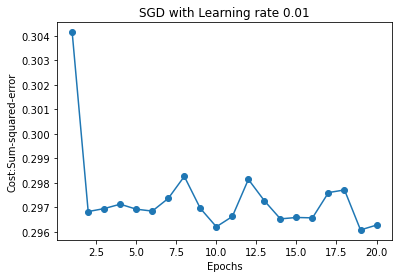

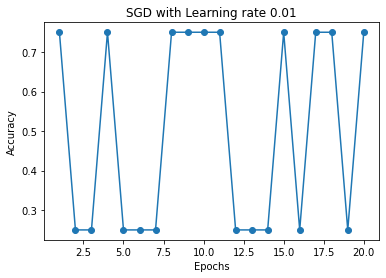

The running of above program is : 3559.0720176696777 ms


In [407]:
try:
    
    print("Enter Classifier Name: 'perceptron', 'adaline', 'sgd'")


    classifier = input("Enter classifier name: ")
    if classifier not in ['perceptron','adaline','sgd']:
        print("You have entered wrong classifier name. Please choose from: 'perceptron', 'adaline', 'sgd' ")
        raise Exception ()

        
    print("Data File Path Information: ")
    print("Link for wifi_localization Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt")
    print("Link for Data: ")

    data_path = input("Enter Data Path Link:")
    df = pd.read_csv(data_path,sep='\t',header = None)

    X = df.iloc[:,0:7].values
    y = df.iloc[:,7].values
    y = np.where(y==1,1,-1)

    # Normalizing dataset
    X_std = np.copy(X)
    X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
    X_std[:, 4] = (X[:, 4] - X[:, 4].mean()) / X[:, 4].std()
    X_std[:, 5] = (X[:, 5] - X[:, 5].mean()) / X[:, 5].std()
    X_std[:, 6] = (X[:, 6] - X[:, 6].mean()) / X[:, 6].std()
    
    start_time = time.time()
    if classifier == "perceptron":
        start_time = time.time()
        ppn1 = Perceptron(eta = 0.01,n_iter=20,random_state=1)
        ppn1.fit(X_std,y)
        plt.plot(range(1, len(ppn1.errors) + 1), ppn1.errors, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Number of updates')
        plt.title('Perceptron with Learning rate 0.01')
        plt.show()
        
        ppn2 = Perceptron(eta = 0.01,n_iter=20,random_state=1)
        ppn2.fit(X_std,y)
        plt.plot(range(1, len(ppn2.accuracy) + 1), ppn2.accuracy, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Perceptron with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
        
    elif classifier == "adaline":
        start_time = time.time()
        adl1 = Adaline(eta = 0.01,n_iter=20,random_state=1)
        adl1.fit(X_std,y)
        plt.plot(range(1, len(adl1.cost_) + 1), adl1.cost_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost:Sum-squared-error')
        plt.title('Adaline with Learning rate 0.01')
        plt.show()
        
        adl2 = Adaline(eta = 0.01,n_iter=20,random_state=1)
        adl2.fit(X_std,y)
        plt.plot(range(1, len(adl2.accuracy_) + 1), adl2.accuracy_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Adaline with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
        
    elif classifier == "sgd":
        start_time = time.time()
        sgd1 = AdalineSGD(eta = 0.01,n_iter=20,random_state=1)
        sgd1.fit(X_std,y)
        plt.plot(range(1, len(sgd1.cost_) + 1), sgd1.cost_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost:Sum-squared-error')
        plt.title('SGD with Learning rate 0.01')
        plt.show()
        
        sgd2 = AdalineSGD(eta = 0.0001,n_iter=20,random_state=1)
        sgd2.fit(X_std,y)
        plt.plot(range(1, len(sgd2.accuracy_) + 1), sgd2.accuracy_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('SGD with Learning rate 0.01')
        plt.show()
        end_time = time.time()
        print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
    
    else: 
        print("Something went Wrong, Check and Run the program again!")

        
except:
     print("Something went Wrong, Check and Run the program again!")

# Task 7

In [401]:
print("Multiclass classifier implementation using SGD binary classfier")
try:
    
    

    print("Data File Path Information: ")
    print("Link for IRIS Data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data")
    print("Link for   Data: ")

    data_path = input("Enter Data Path Link:")

    df = pd.read_csv(data_path,header = None, encoding='utf-8')
    col_cnt = df.shape[1]
    X = df.iloc[:,0:col_cnt-1].values
    y = df.iloc[:,col_cnt-1].values
    
    #X = df.iloc[:,0:4].values
    #y = df.iloc[:,4].values


    
    #Normalizing the feature
    X_std = np.copy(X)
    
    for i in range(col_cnt-1):
        X_std[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
    #X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    #X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    #X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    #X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
    
    # Number of unique label
    n_classes = np.unique(y)

    
    start_time = time.time()
    # Fit the binary classifiers for each class and store the classifiers in an array
    classifiers = []
    for i in n_classes:
        new_y = np.where(y== i, 1, -1)
        clf = AdalineSGD(eta = 0.01,n_iter=20,random_state=1)
        clf.fit(X_std, new_y)
        classifiers.append(clf)
        #print('In this iteration {} is -1 and rest two label is 1'.format(i))


    # Run prediction for each classifier and store the prediction in an array
    score =[]
    for i in classifiers:

        pred = i.predict(X_std)
        score.append(pred)
        '''
        plt.plot(range(1, len(i.cost_) + 1), i.cost_, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Cost:Sum-squared-error')
        plt.title('SGD with Learning rate 0.01')
        plt.show()
        '''
    
    pred=[0 for _ in range(X_std.shape[0])]

    for i in range(len(n_classes)):

        for j in range(len(score[i])):

            if score[i][j] == 1:
                pred[j]=n_classes[i]
    accuracy_multi = (np.sum(pred==y)/y.size)*100
    print('Accuracy of the SGD multiclass classfier is {}%'.format(accuracy_multi))
    end_time = time.time()
    print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
except:
     print("Something went Wrong, Check and Run the program again!")

Multiclass classifier implementation using SGD binary classfier
Data File Path Information: 
Link for IRIS Data: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Link for   Data: 
Enter Data Path Link:https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data
Accuracy of the SGD multiclass classfier is 72.0%
The running of above program is : 309.8104000091553 ms


# Task 7 : Another Dataset

In [399]:
print("Multiclass classifier implementation using SGD binary classfier for wifi_localization dataset")
try:
    print("Data File Path Information: ")
    print("Link for wifi_localization Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt")
    print("Link for   Data: ")

    data_path = input("Enter Data Path Link:")

    df = pd.read_csv(data_path,sep='\t',header = None)
    col_cnt = df.shape[1]
    X = df.iloc[:,0:col_cnt-1].values
    y = df.iloc[:,col_cnt-1].values
    #X = df.iloc[:,0:7].values
    #y = df.iloc[:,7].values
    
  
    #Normalizing the feature
    X_std = np.copy(X)
    for i in range(col_cnt-1):
        X_std[:, i] = (X[:, i] - X[:, i].mean()) / X[:, i].std()
    #X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
    #X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()
    #X_std[:, 2] = (X[:, 2] - X[:, 2].mean()) / X[:, 2].std()
    #X_std[:, 3] = (X[:, 3] - X[:, 3].mean()) / X[:, 3].std()
    #X_std[:, 4] = (X[:, 4] - X[:, 4].mean()) / X[:, 4].std()
    #X_std[:, 5] = (X[:, 5] - X[:, 5].mean()) / X[:, 5].std()
    #X_std[:, 6] = (X[:, 6] - X[:, 6].mean()) / X[:, 6].std()
    
    # Number of unique label
    n_classes = np.unique(y)

    
    start_time = time.time()
    # Fit the binary classifiers for each class and store the classifiers in an array
    classifiers = []
    for i in n_classes:
        new_y = np.where(y== i, 1, -1)
        clf = AdalineSGD(eta = 0.01,n_iter=20,random_state=1)
        clf.fit(X_std, new_y)
        classifiers.append(clf)
        #print('In this iteration {} is -1 and rest two label is 1'.format(i))


    # Run prediction for each classifier and store the prediction in an array
    score =[]
    for i in classifiers:

        pred = i.predict(X_std)
        score.append(pred)

    
    pred=[0 for _ in range(X_std.shape[0])]

    for i in range(len(n_classes)):

        for j in range(len(score[i])):

            if score[i][j] == 1:
                pred[j]=n_classes[i]
    accuracy_multi = (np.sum(pred==y)/y.size)*100
    print('Accuracy of the SGD multiclass classfier is {}%'.format(accuracy_multi))
    end_time = time.time()
    
    print("The running of above program is : {} ms".format((end_time-start_time) * 10**3))
    

except:
     print("Something went Wrong, Check and Run the program again!")

Multiclass classifier implementation using SGD binary classfier for wifi_localization dataset
Data File Path Information: 
Link for wifi_localization Data: https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt
Link for   Data: 
Enter Data Path Link:https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt
Accuracy of the SGD multiclass classfier is 56.35%
The time of execution of above program is : 6213.402032852173 ms
